Loading dataset

In [66]:
import pandas as pd
path = 'C:/Users/maksd/OneDrive/Pulpit/ASI/asi-project/data/'

df = pd.read_csv(path + 'Extended_Employee_Performance_and_Productivity_Data.csv')
print(df.shape)
df.head()

(100000, 20)


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


Data exploartion

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [59]:
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

Employee_ID                    0.0
Department                     0.0
Employee_Satisfaction_Score    0.0
Promotions                     0.0
Training_Hours                 0.0
Team_Size                      0.0
Remote_Work_Frequency          0.0
Sick_Days                      0.0
Overtime_Hours                 0.0
Projects_Handled               0.0
Work_Hours_Per_Week            0.0
Monthly_Salary                 0.0
Performance_Score              0.0
Education_Level                0.0
Years_At_Company               0.0
Hire_Date                      0.0
Job_Title                      0.0
Age                            0.0
Gender                         0.0
Resigned                       0.0
dtype: float64

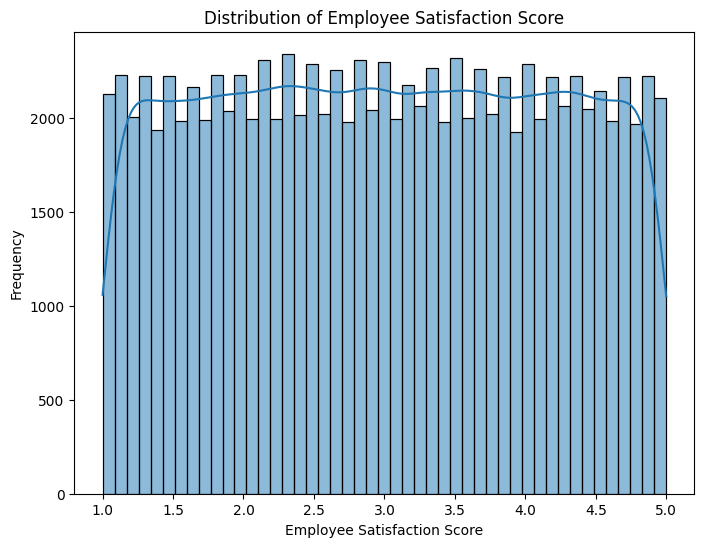

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Employee_Satisfaction_Score'], kde=True)
plt.title("Distribution of Employee Satisfaction Score")
plt.xlabel("Employee Satisfaction Score")
plt.ylabel("Frequency")
plt.show()

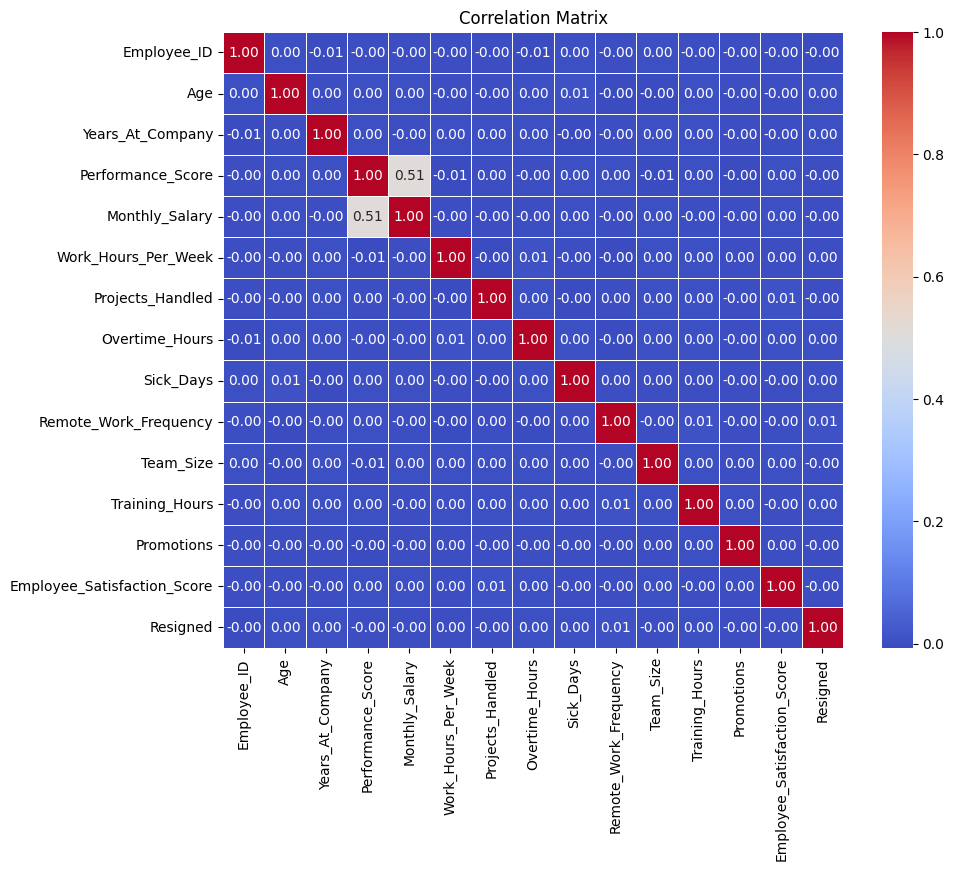

In [61]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Data cleaning/Encoding Categorical Variables/Scaling values in dataset

In [67]:
df = df.drop(['Employee_ID'], axis=1)
df = df.drop(['Hire_Date'], axis=1)
df = df.drop(['Education_Level'], axis=1)
df = df.drop(['Overtime_Hours'], axis=1)
df = df.drop(['Age'], axis=1)
df = df.drop(['Work_Hours_Per_Week'], axis=1)
df = df.drop(['Sick_Days'], axis=1)
df = df.drop(['Promotions'], axis=1)
df = df.drop(['Years_At_Company'], axis=1)

In [68]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Job_Title'] = label_encoder.fit_transform(df['Job_Title'])
#df['Hire_Date'] = pd.to_datetime(df['Hire_Date'])
#df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
#df['Hire_Date'] = df['Hire_Date'].dt.year

In [26]:
from sklearn.preprocessing import MinMaxScaler
df['Overtime_Ratio'] = ((df['Overtime_Hours'] + df['Work_Hours_Per_Week']) / df['Work_Hours_Per_Week'])
scaler = MinMaxScaler()
df['Overtime_Ratio'] = scaler.fit_transform(df[['Overtime_Ratio']])

In [27]:
#df['Tenure'] = 2024 - df['Years_At_Company']

In [69]:
scaler = MinMaxScaler()
numerical_features = ['Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
                      'Overtime_Hours', 'Sick_Days', 'Training_Hours', 'Team_Size', 'Promotions']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

KeyError: "['Work_Hours_Per_Week', 'Overtime_Hours', 'Sick_Days', 'Promotions'] not in index"

In [71]:
scaler = MinMaxScaler()
numerical_features = ['Monthly_Salary','Projects_Handled',
                      'Training_Hours', 'Team_Size']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [29]:
df['Overtime_Projects'] = df['Overtime_Hours'] * df['Projects_Handled']
df['Remote_Performance'] = df['Remote_Work_Frequency'] * df['Performance_Score']

Feature and Target Variable Selection

In [72]:
y = df['Employee_Satisfaction_Score']
x = df.drop('Employee_Satisfaction_Score', axis=1)

In [73]:
y.head()

0    2.63
1    1.72
2    3.17
3    1.86
4    1.25
Name: Employee_Satisfaction_Score, dtype: float64

In [74]:
x.head()

,Department,Gender,Job_Title,Performance_Score,Monthly_Salary,Projects_Handled,Remote_Work_Frequency,Team_Size,Training_Hours,Resigned
0,4,1,5,5,0.563107,0.653061,0,0.722222,0.666667,False
1,2,1,2,5,0.708738,0.693878,100,0.611111,0.616162,False
2,2,1,5,3,0.388350,0.551020,50,0.500000,0.010101,False
3,0,0,0,2,0.184466,0.204082,100,0.500000,0.000000,False
4,1,0,0,2,0.184466,0.224490,100,0.777778,0.090909,False


Divide the dataset into training and test set

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [76]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
grid_search.fit(X_train_pca, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test_pca)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results = {
    'RMSE': rmse,
    'MAE': mae,
    'R2 Score': r2,
    'Best Parameters': grid_search.best_params_
}

print("Model Evaluation Metrics:")
for metric, value in results.items():
    print(f"{metric}: {value}")

Model Evaluation Metrics:
RMSE: 1.1506361796358073
MAE: 0.994282850001405
R2 Score: -0.0015699658914147818
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


In [38]:
print(y_pred[3])
print(y_test.iloc[4])

3.0415182691263176
3.68


Random Forest Regression and evaluation

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=10, n_estimators=200)
rf.fit(X_train_pca, y_train)

y_pred = rf.predict(X_test_pca)
print(y_pred[5])
print(y_test.iloc[5])
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2_score = rf.score(X_test_pca, y_test)
print ('Root Means Square Error = ', rmse)
print(f"R² Score: {r2_score}")

3.018366275888161
4.46
Root Means Square Error =  1.1506067136023825
R² Score: -0.0015186691970601185


Linear Regression Model training and evaluation

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)
print(y_pred[4])
print(y_test.iloc[4])
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2_score = lin_reg.score(x_test, y_test)
print ('Root Means Square Error = ', rmse)
print(f"R² Score: {r2_score}")

2.995699987938822
3.68
Root Means Square Error =  1.1498946510580577
R² Score: -0.000279456430752667


Decision Tree Regressor Model training and evaluation 

In [79]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
rmse = mean_squared_error(y_test, y_pred, squared = False)
r2_score = regressor.score(x_test, y_test)
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2_score}")

Root Mean Squared Error: 1.6572563983886137
R² Score: -1.0777086637623374
